<h3>import libraries</h3>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

<h3>Load the dataset</h3>

In [4]:
df = pd.read_csv(r'E:\CodeSoft\Titanic-Dataset.csv')

print(df.head(3))
print(df.info())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         8

<h3>Data Cleaning</h3>

In [5]:
# Fill missing values without using inplace=True
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [6]:
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

<h3>Encoding Categorical Variables</h3>

In [9]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

<h3>Data Visualization</h3>

<h4>Survival Rate by Gender</h4>

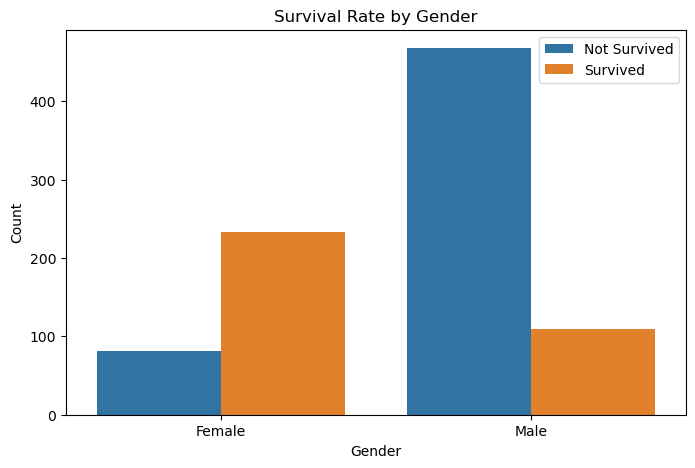

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

<h4>Survival Rate by Passenger Class</h4>

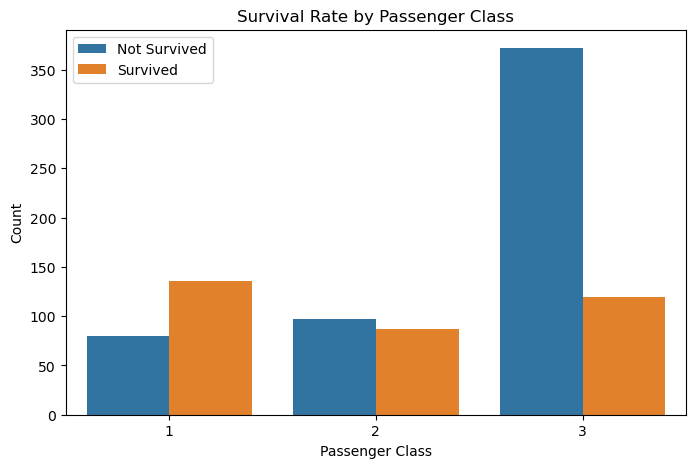

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

<h4>Age Distribution of Survived vs Not Survived</h4>

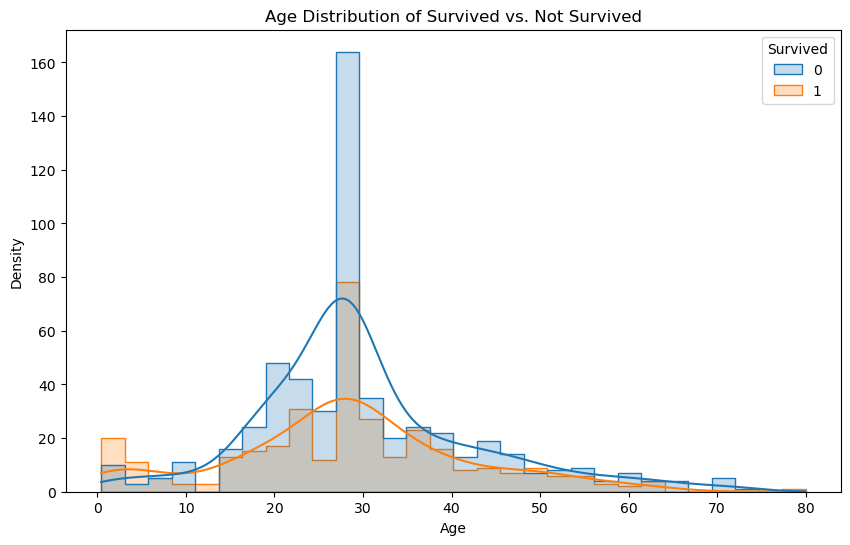

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, element='step')
plt.title('Age Distribution of Survived vs. Not Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

<h4>Fare Distribution by Passenger Class</h4>

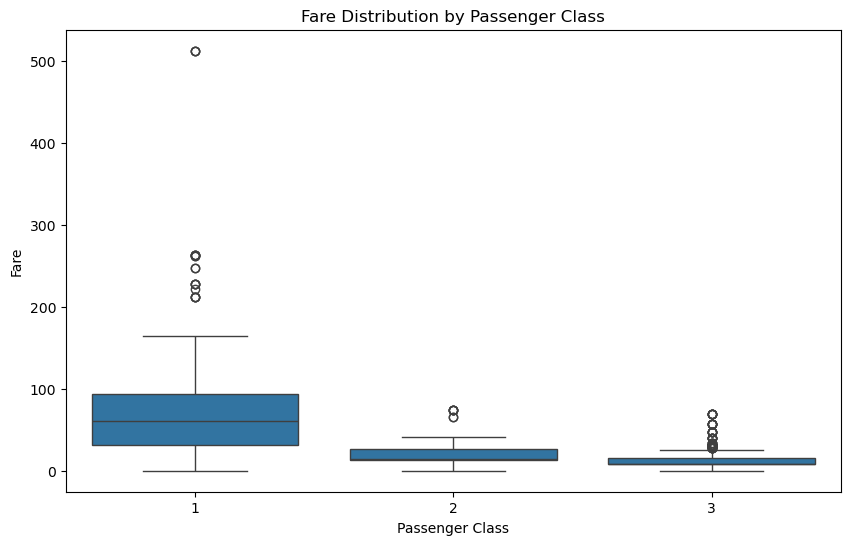

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

<h3>Feature Selection</h3>

In [17]:
x = df.drop('Survived', axis=1)  
y = df['Survived']  

<h3>Split the Dataset</h3>

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<h3>Model Building - Random Forest Classifier</h3>

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

<h3>Predictions</h3>

In [20]:
y_pred = model.predict(x_test)

<h3>Model Evaluation</h3>

In [21]:
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

